In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
from nuprobe.inputs import NuSystem, create_U_PMNS, create_alpha
from nuprobe.probability import nuprobe
from nuprobe.params import theta12n, theta23n, theta13n, delta13n, m1n, m2n, m3n
from nuprobe.params import theta12i, theta23i, theta13i, delta13i, m1i, m2i, m3i

In [203]:
def run(x1, x2, x3, p):
    t0 = time.time()
    nu_sys = NuSystem(3)
    nu_sys.set_standard_normal()
    nu_sys.set_nonunitary(1, 1, x1)
    nu_sys.set_nonunitary(2, 2, x2)
    nu_sys.set_nonunitary(3, 3, x3)
    alpha1 = create_alpha(nu_sys.nonunitary.copy())
    
    UPMNS = create_U_PMNS(nu_sys.theta, nu_sys.delta) 
    U1 = alpha1 @ UPMNS
    
    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 5, num)
    L = 1300
    
    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, U1, antinu=False, const_matter=True, V_NSI=None))
        
#     plt.rc('text', usetex=True)
#     plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath,slashed}"
#     plt.rcParams.update({'figure.autolayout': True})
#     plt.rcParams["figure.figsize"] = (8, 7)
#     plt.rc('font', **{'family' : 'serif', 'size' : 17})

    unitary = PE
    nonunitary = PE1
    
    
    
    return (unitary, nonunitary)

In [216]:
def test(a12, a23, a13, p):
    nu_sys = NuSystem(3)
    nu_sys.set_theta(1, 2, a12)
    nu_sys.set_theta(2, 3, a23)
    nu_sys.set_theta(1, 3, a13)
    nu_sys.set_delta(1, 3, p)
    UPMNS2 = create_U_PMNS(nu_sys.theta, nu_sys.delta)    
    
    nu_sys.set_standard_normal()
    UPMNS1 = create_U_PMNS(nu_sys.theta, nu_sys.delta)
    
    PE = []
    PE1 = []
    num = 1000
    EE = np.logspace(0, 2, num)
    L = 1300

    for i in range(num):
        PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS1, antinu=False, const_matter=True, V_NSI=None))
        PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS2, antinu=False, const_matter=True, V_NSI=None)) 
        
    return (PE, PE1)

In [217]:
all_results = []
for a12 in (0.5707, 0.5836, 0.597):
    for a23 in (0.836, 0.8587, 0.8762):
        for a13 in (0.1475, 0.1496, 0.1519):
            for p in (2.9496, 3.3859, 4.2935):
                all_results.append((a12, a23, a13, p, test(a12, a23, a13, p)))

In [277]:
error_list = []
for (a12, a23, a13, p, (PE, PE1)) in all_results:
    diff = [bound - mean for mean, bound in zip(PE, PE1)]
    error = [d / mean for d, mean in zip(diff, PE)] 
    error_list.append((a12, a23, a13, p, max(error), min(error)))

In [278]:
for (a12, a23, a13, p, error_max, error_min) in error_list:
    if a23 == 0.8587:
        if a13 == 0.1496:
            if p == 3.3859:
                print((a12, error_max, error_min))

(0.5707, 0.0026063651331490792, -0.036530333324880544)
(0.5836, 0.0, 0.0)
(0.597, 0.037080272006321226, -0.0025981227899584246)


In [279]:
for (a12, a23, a13, p, error_max, error_min) in error_list:
    if a12 == 0.5836:
        if a13 == 0.1496:
            if p == 3.3859:
                print((a23, error_max, error_min))

(0.836, 0.08252125332713993, -0.046597457954665474)
(0.8587, 0.0, 0.0)
(0.8762, 0.03596915183237058, -0.061283717855695176)


In [280]:
for (a12, a23, a13, p, error_max, error_min) in error_list:
    if a12 == 0.5836:
        if a23 == 0.8587:
            if p == 3.3859:
                print((a13, error_max, error_min))

(0.1475, 0.011858453992746895, -0.029283696236634935)
(0.1496, 0.0, 0.0)
(0.1519, 0.03252791945863379, -0.01288995456029377)


In [281]:
for (a12, a23, a13, p, error_max, error_min) in error_list:
    if a12 == 0.5836:
        if a23 == 0.8587:
            if a13 == 0.1496:
                print((p, error_max, error_min))

(2.9496, 0.0518375296558794, -0.7730217031789356)
(3.3859, 0.0, 0.0)
(4.2935, 2.7205615892879598, -0.3412526880360365)


In [154]:
for (a12, a23, a13, p, error_max) in error_list:
    if p == 3.3859:
        print((a12, a23, a13, error_max))

(0.5707, 0.836, 0.1475, 0.05588739073063143)
(0.5707, 0.836, 0.1496, 0.04394738485944442)
(0.5707, 0.836, 0.1519, 0.03111014301892396)
(0.5707, 0.8587, 0.1475, -0.023836040324730773)
(0.5707, 0.8587, 0.1496, 0.002641071378820219)
(0.5707, 0.8587, 0.1519, 0.035286008385110125)
(0.5707, 0.8762, 0.1475, 0.00838418468909238)
(0.5707, 0.8762, 0.1496, 0.03874322444254689)
(0.5707, 0.8762, 0.1519, 0.07246515580513851)
(0.5836, 0.836, 0.1475, 0.09470557804995852)
(0.5836, 0.836, 0.1496, 0.08238153719105937)
(0.5836, 0.836, 0.1519, 0.06911374857905836)
(0.5836, 0.8587, 0.1475, 0.011479500346011105)
(0.5836, 0.8587, 0.1496, 0.0)
(0.5836, 0.8587, 0.1519, 0.03259125340075652)
(0.5836, 0.8762, 0.1475, 0.0057723823743619194)
(0.5836, 0.8762, 0.1496, 0.03608211455704907)
(0.5836, 0.8762, 0.1519, 0.06974978063631158)
(0.597, 0.836, 0.1475, 0.13409146678563122)
(0.597, 0.836, 0.1496, 0.12139634761348155)
(0.597, 0.836, 0.1519, 0.10771194294707458)
(0.597, 0.8587, 0.1475, 0.04819706819415498)
(0.597, 0.

In [285]:
ptest = []
for p in np.linspace(2.9496, 3.4321, 50):
    for a12 in (0.5707, 0.58, 0.597):
        for a23 in (0.836, 0.8762):
            for a13 in (0.1475, 0.1519):
                ptest.append((a12, a23, a13, p, test(a12, a23, a13, p)))

In [284]:
error_list_p = []
for (a12, a23, a13, p, (PE, PE1)) in ptest:
    diff = [bound - mean for mean, bound in zip(PE, PE1)]
    error = [d / mean for d, mean in zip(diff, PE)] 
    error_list_p.append((a12, a23, a13, p, max(error), min(error)))
    
for ((a12, a23, a13, p, error_max, error_min)) in error_list_p:
    if error_max < 0.2:
        if abs(error_min) < 0.2:
            print((a12, a23, a13, p, error_max, error_min))

(0.5707, 0.836, 0.1475, 3.324877777777778, 0.02752314076767087, -0.1547984746489653)
(0.5707, 0.836, 0.1519, 3.324877777777778, 0.020279918514541164, -0.12266095456285427)
(0.5707, 0.8762, 0.1475, 3.324877777777778, 0.005548954844227682, -0.18539387277929087)
(0.5707, 0.8762, 0.1519, 3.324877777777778, 0.06942538682558054, -0.19276119144113432)
(0.58, 0.836, 0.1475, 3.324877777777778, 0.052646995872239505, -0.1525006120059735)
(0.58, 0.836, 0.1519, 3.324877777777778, 0.04080269579507683, -0.11681286550740999)
(0.58, 0.8762, 0.1475, 3.324877777777778, 0.003658105195163355, -0.17091038917571041)
(0.58, 0.8762, 0.1519, 3.324877777777778, 0.06745971192416826, -0.1740858972181887)
(0.597, 0.836, 0.1475, 3.324877777777778, 0.09907083456563623, -0.1498127315661079)
(0.597, 0.836, 0.1519, 3.324877777777778, 0.08175281418225738, -0.11037200642374272)
(0.597, 0.8762, 0.1475, 3.324877777777778, 0.010268080670854905, -0.151065924043731)
(0.597, 0.8762, 0.1519, 3.324877777777778, 0.0640086932562311

In [26]:
all_results = []
for a12 in (0.5807, 0.5836, 0.5865):
    for a23 in (0.8476, 0.8587, 0.8678):
        for a13 in (0.1431, 0.1496, 0.1566):
            for p in (3.3211, 3.3859, 3.4321):
                all_results.append((a12, a23, a13 , p, test(a12, a23, a13, p)))

In [173]:
error_list = []
for (a12, a23, a13, p, (PE, PE1)) in all_results:
    diff = [bound - mean for mean, bound in zip(PE, PE1)]
    error = [d / mean for d, mean in zip(diff, PE)] 
    error_list.append((a12, a23, a13, p, max(error)))

In [174]:
for (a12, a23, a13, p, error_max) in error_list:
    if a23 == 0.8587:
        if a13 == 0.1496:
            if p == 3.3859:
                print((a12, error_max))

(0.5707, 0.0026063651331490792)
(0.5836, 0.0)
(0.597, 0.037080272006321226)


In [175]:
for (a12, a23, a13, p, error_max) in error_list:
    if a12 == 0.5836:
        if a13 == 0.1496:
            if p == 3.3859:
                print((a23, error_max))

(0.836, 0.08252125332713993)
(0.8587, 0.0)
(0.8762, 0.03596915183237058)


In [176]:
for (a12, a23, a13, p, error_max) in error_list:
    if a12 == 0.5836:
        if a23 == 0.8587:
            if p == 3.3859:
                print((a13, error_max))

(0.1475, 0.011858453992746895)
(0.1496, 0.0)
(0.1519, 0.03252791945863379)


In [177]:
for (a12, a23, a13, p, error_max) in error_list:
    if a12 == 0.5836:
        if a23 == 0.8587:
            if a13 == 0.1496:
                print((p, error_max))

(2.9496, 0.0518375296558794)
(3.3859, 0.0)
(4.2935, 2.7205615892879598)


In [178]:
for (a12, a23, a13, p, error_max) in error_list:
    if p == 3.3859:
        if a23 == 0.9076:
            print((a12, a23, a13, error_max))

In [71]:
p_error_test = []
for p in np.linspace(1.8326, 4.2935, 100):
    p_error_test.append((p, test(0.5836, 0.8587, 0.1496, p)))

In [268]:
p_osc_error = []
for (p, (PE, PE1)) in p_error_test:
    diff = [bound - mean for mean, bound in zip(PE, PE1)]
    error = [d / mean for d, mean in zip(diff, PE)] 
    p_osc_error.append((p, max(error)))

In [55]:
list_p = []
list_error = []
for (p,  error_max) in p_osc_error:
    list_p.append(p)
    list_error.append(error_max)

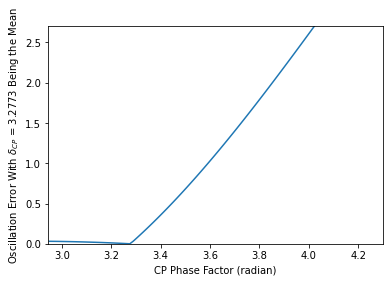

In [57]:
plt.xlim(2.945, 4.3)
plt.ylim(0, 2.7)
plt.plot(list_p, list_error)
plt.xlabel('CP Phase Factor (radian)')
plt.ylabel(r'Oscillation Error With $\delta_{CP}$ = 3.2773 Being the Mean')
plt.savefig('osc_error vs phase_1.jpg', format = 'jpg', dpi = 1200)